# Research of cAlgo exported TICK data

### Extracting from cAlgo
used this cBot to export data: http://ctdn.com/algos/cbots/show/588

had to change c# code slightly to extract Bid & Ask but not from depth.<br>
logic: when backtesting on cAlgo, it uses Bid & Ask without knowledge of depth<br>
also: <strong>spread</strong> is simple ASK - BID calculation performed during export

## Python Code:

In [1]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### creating inputs:
pair = "EURCHF"



folder = "../data/"
csv = folder + pair +'-ticks.csv'

print csv

../data/EURCHF-ticks.csv


content of csv file:

date,ask,bid,spread<br>
2013-04-26 15:16:54.372,1.226800,1.226670,0.000130<br>
2013-04-26 15:16:54.583,1.226820,1.226690,0.000130<br>
2013-04-26 15:16:54.583,1.226810,1.226690,0.000120


In [3]:
### Importing csv file

usecols = ['date', 'ask', 'bid']
#dtypes = {'date':pd.tslib.Timestamp, 'ask':np.float32, 'bid':np.float32, }
data = pd.read_csv(csv,
                   header = False,
                   usecols = usecols,
                   #dtype=dtypes,
                   parse_dates=['date']
                   #date_parser = dateparse
                   )




In [4]:
### compute spread and convert to pips (not points)
data['spreadPips'] = (data.ask - data.bid)*10000

In [5]:
#display what we have
data.head()

,date,ask,bid,spreadPips
0,2013-04-26 15:16:54.372,1.22680,1.22667,1.3
1,2013-04-26 15:16:54.583,1.22682,1.22669,1.3
2,2013-04-26 15:16:54.583,1.22681,1.22669,1.2
3,2013-04-26 15:16:59.872,1.22680,1.22667,1.3
4,2013-04-26 15:16:59.872,1.22677,1.22667,1.0


## Interesting bit:

In [6]:
###copy all negative spreads
neg = data[data.spreadPips < 0]

In [7]:
many = '{0:,}'.format(neg.spreadPips.count())
print "So we have %s records with negative Spread!"  %many

So we have 1,027,509 records with negative Spread!


# So many ticks with negative spread?!?

(array([  8.10000000e+01,   3.55000000e+02,   1.95000000e+02,
          5.16000000e+02,   1.47500000e+03,   3.14400000e+03,
          7.38900000e+03,   2.43610000e+04,   1.12985000e+05,
          8.77008000e+05]),
 array([-51.3 , -46.18, -41.06, -35.94, -30.82, -25.7 , -20.58, -15.46,
        -10.34,  -5.22,  -0.1 ]),
 <a list of 10 Patch objects>)

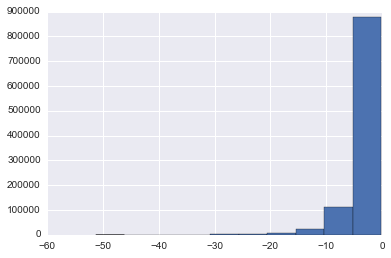

In [8]:
plt.hist(neg.spreadPips.values, bins = 10)

## Let's zoomin on numbers below -10pip

(array([    48.,    138.,    351.,    169.,    480.,   1123.,   1927.,
          4150.,   8331.,  24064.]),
 array([-51.3 , -47.17, -43.04, -38.91, -34.78, -30.65, -26.52, -22.39,
        -18.26, -14.13, -10.  ]),
 <a list of 10 Patch objects>)

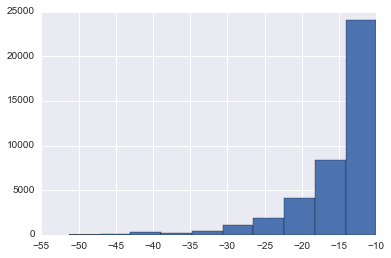

In [9]:
neg1 = neg[neg.spreadPips < -10]
plt.hist(neg1.spreadPips.values)

## Lets zoomin below -30 pips (not points)

(array([   9.,   44.,   59.,  111.,  229.,  105.,   60.,  110.,  218.,  388.]),
 array([-51.3 , -49.17, -47.04, -44.91, -42.78, -40.65, -38.52, -36.39,
        -34.26, -32.13, -30.  ]),
 <a list of 10 Patch objects>)

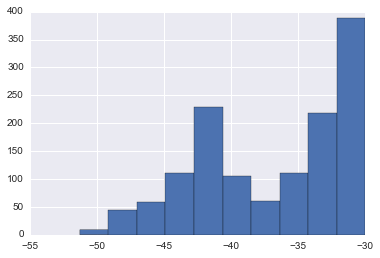

In [10]:
neg2 = neg[neg.spreadPips < -30]
plt.hist(neg2.spreadPips.values)

# Lets see entries for below -45 pips!

In [11]:
neg45 = neg[neg.spreadPips < -45]
print "We have %s ticks with spread below -45 pips! " %neg45.spreadPips.count()


We have 110 ticks with spread below -45 pips! 


In [12]:
neg45.head(100)

,date,ask,bid,spreadPips
20391645,2015-06-25 13:24:32.667,1.04722,1.05183,-46.1
20391646,2015-06-25 13:24:37.393,1.04722,1.05181,-45.9
20391647,2015-06-25 13:24:37.393,1.04725,1.05181,-45.6
20391648,2015-06-25 13:24:37.393,1.04727,1.05181,-45.4
20391649,2015-06-25 13:24:38.254,1.04727,1.05180,-45.3
20391650,2015-06-25 13:24:38.254,1.04708,1.05180,-47.2
20391651,2015-06-25 13:24:38.254,1.04704,1.05180,-47.6
20391652,2015-06-25 13:24:39.133,1.04704,1.05177,-47.3
20391653,2015-06-25 13:24:39.133,1.04706,1.05177,-47.1
20391654,2015-06-25 13:24:39.133,1.04709,1.05177,-46.8
